In [70]:
import torch
# import cv2
import math
# import Exception
from matplotlib import pyplot as plt
import torch
import torchvision.transforms.functional as F

In [74]:
data_dir = "./data/fsgan_test/"
image_dict = torch.load(data_dir+"fsgan_image_stages.pth", map_location=torch.device('cpu'))

In [72]:
image_dict.keys()

dict_keys(['src_frame', 'target_frame', 'r_bg_mask', 'reenactment', 'inpainting', 'completion', 'transfer', 'blend_final', 'fsgan_result', 'gfp_restored_face'])

In [73]:
image = image_dict['gfp_restored_face']
print(image[0].shape)
image = torch.stack(image)
print(image.shape)



torch.Size([256, 256])


TypeError: stack(): argument 'tensors' (position 1) must be tuple of Tensors, not Tensor

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


r_bg_mask result type Float can't be cast to the desired output type Bool


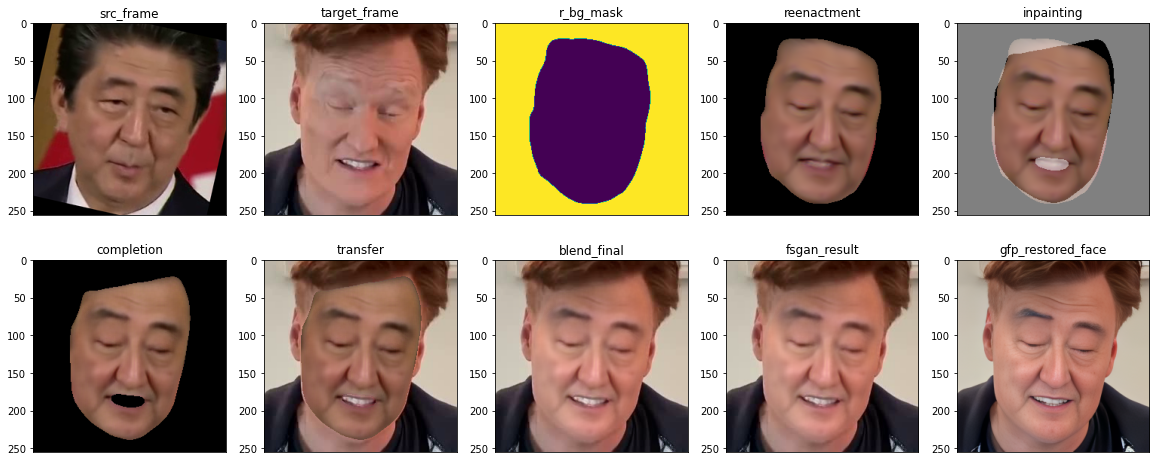

In [75]:
imlen = len(image_dict.keys())

fig, ax = plt.subplots(2,math.ceil(imlen/2), figsize=(20, 8))
ax = ax.ravel()

for i, (stage,image) in enumerate(image_dict.items()):
    ax[i].set_title(stage)
    ax[i].set_xticks([])

    try:
        image_tensor = image.detach().clone()
        image_tensor *= 0.5
        image_tensor += 0.5
        ax[i].imshow(image_tensor.permute(1, 2, 0));
    except Exception as e:
        image_tensor = image[0]
        ax[i].imshow(image_tensor)
        print(stage,e)
    
plt.show()